In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


# **Problem Definition:**

The objective of this project is to predict the sale prices of houses in Ames, Iowa using machine learning techniques. Accurate predictions of house prices have significant implications for buyers, sellers, and investors, as they enable informed decision-making and serve as a vital economic indicator for monitoring market trends.

The project involves exploratory data analysis, feature selection and model development using techniques like linear regression and random forest to provide actionable recommendations for real estate investments based on the predicted house prices.

# **DATA ACQUISITION:**

# Import all libraries:

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

# Upload the Dataset:

In [3]:
train_data = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/train.csv")
test_data = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/test.csv")

# **EXPLORATORY DATA ANALYSIS:**

In [4]:
pd.set_option('display.max_columns', None)
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
train_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [7]:
train_data.shape

(1460, 81)

In [8]:
train_data[train_data.duplicated()].count().sum()

0

> ***Analyzing the distribution of the target variable***

<AxesSubplot:>

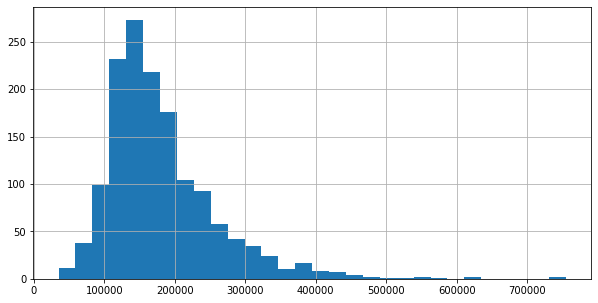

In [9]:
train_data['SalePrice'].hist(figsize=(10,5),bins=30)

It is possible to observe that Sale Price have a  positive skewness and deviate from the normal distribution.

> ***Data visualization - correlation between numeric variables***

Text(0.5, 1.0, 'House Prices - Correlation')

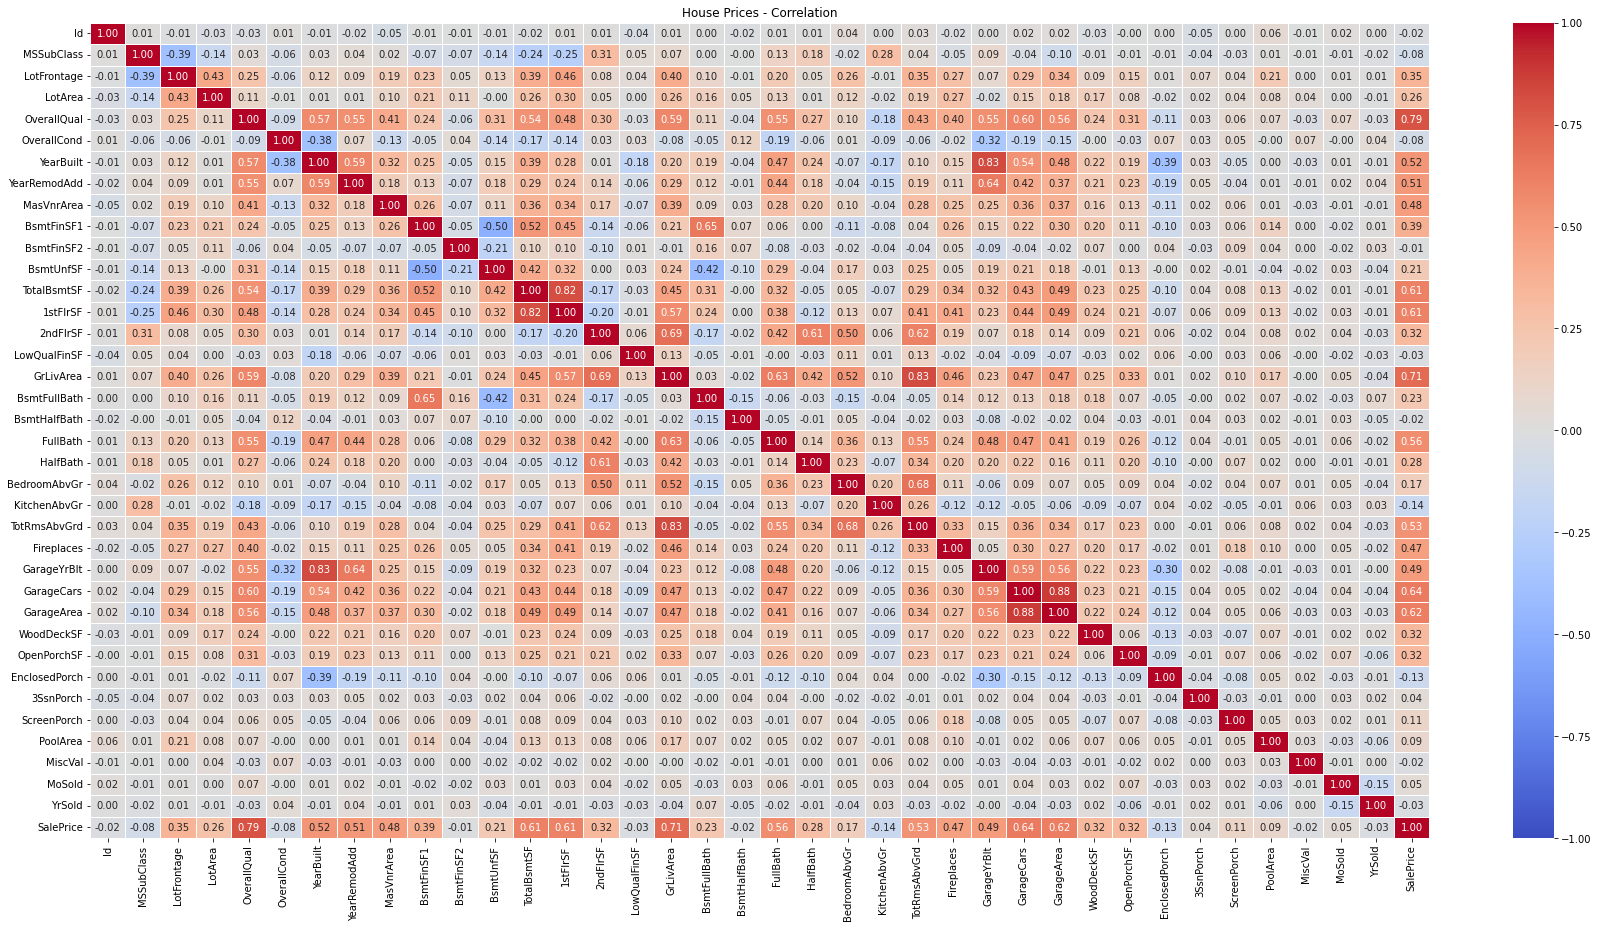

In [10]:
plt.figure(figsize=(30,15))
sns.heatmap(train_data.corr(), cmap='coolwarm', annot=True, linewidth=1, vmin=-1, vmax=1, center=0, fmt=".2f")
plt.title('House Prices - Correlation')

***Correlation Values:***

0.9 or higher (positive or negative) indicates a very strong correlation.

0.7 to 0.9 (positive or negative) indicates a strong correlation.

0.5 to 0.7 (positive or negative) indicates a moderate correlation.

0.3 to 0.5 (positive or negative) indicates a weak correlation.

0 to 0.3 (positive or negative) indicates a negligible correlation.

In [11]:
corrmat = train_data.corr()
corr_threshold = 0.5
cols = corrmat[corrmat['SalePrice'] >= corr_threshold]['SalePrice'].index
correlated_variables = cols.tolist()
print(correlated_variables)

['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea', 'SalePrice']


Plot visualization of the correlation of the variables above.

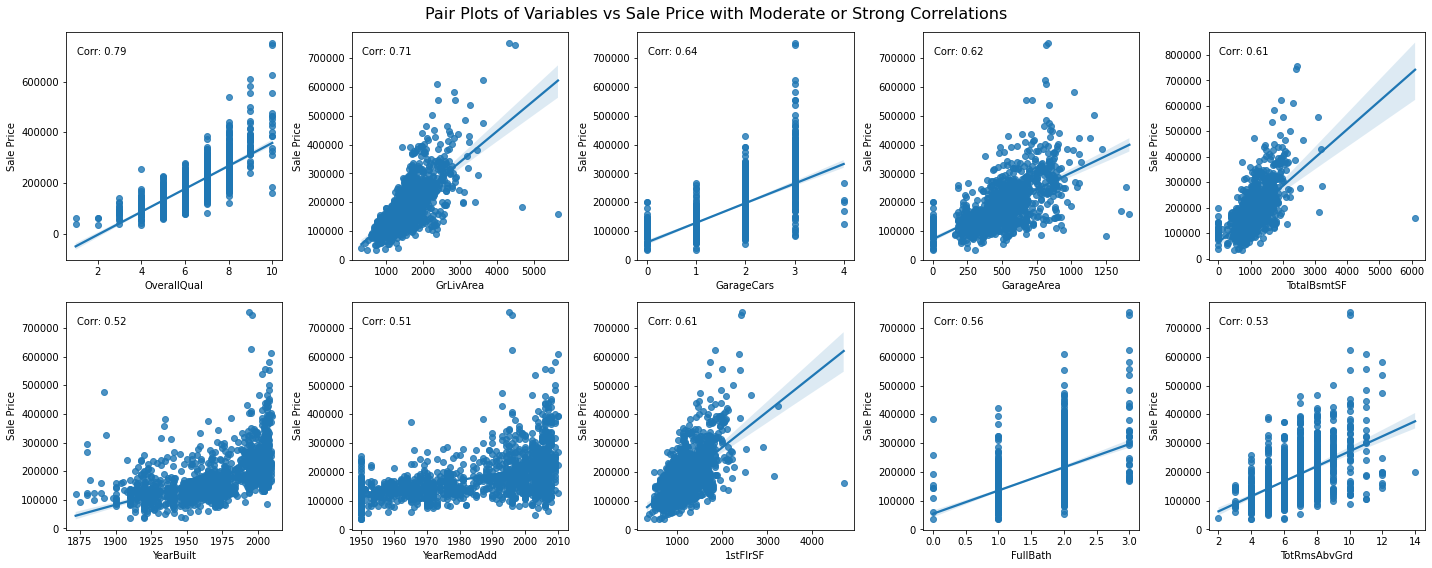

In [12]:
from scipy.stats import pearsonr

variables = ['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', 'YearBuilt', 'YearRemodAdd', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd']

# Remove rows with missing values in the selected variables
filtered_data = train_data.dropna(subset=variables + ['SalePrice'])

fig, ax = plt.subplots(2, 5, figsize=(20, 8))

for i, var in enumerate(variables):
    row = i // 5  # Calculate the row index based on the iteration
    col = i % 5   # Calculate the column index based on the iteration
    
    # Create a scatter plot with regression line
    sns.regplot(data=filtered_data, x=var, y='SalePrice', ax=ax[row, col])
    ax[row, col].set_xlabel(var)
    ax[row, col].set_ylabel('Sale Price')

    # Calculate the correlation coefficient
    corr, _ = pearsonr(filtered_data[var], filtered_data['SalePrice'])
    
    # Add the correlation coefficient as text annotation
    ax[row, col].text(0.05, 0.9, f'Corr: {corr:.2f}', transform=ax[row, col].transAxes)
    
fig.suptitle('Pair Plots of Variables vs Sale Price with Moderate or Strong Correlations', fontsize=16)
plt.tight_layout()  # Adjust the layout to prevent overlapping plots
plt.show()

***Strong and moderate correlations between variables and sale price:***

*OverallQual*: The higher the overall quality of the property, the higher the sale price. This correlation is strong.

*GrLivArea*: The larger the above-grade (ground) living area in square feet, the higher the property's sale value. This correlation is strong, with some outliers and data dispersion as the living area increases.

*GarageCars*: The more car capacity in the garage, the higher the sale price. This correlation is moderate.

*GarageArea*: The larger the garage area, the higher the sale price. This correlation is also moderate.
P.S.: it is obvious that this two variables are strongly correlates (as we observed in the correlation plot, the correlation of GarageCars and GarageArea é 0.88). Therefore, we don't need to use both in the model. We will maintain GarageCars, since is the higher correlation.

*TotalBsmtSF*: The larger the total square feet of the basement area, the higher the sale price of the property. This correlation is moderate, with some outliers and data dispersion as the basement size increases.

*YearBuilt*: The more recent the property's construction, the higher the sale value. This correlation is moderate.

*YearRemodAdd*: The more recent the renovation of the property, the higher the sale price. This correlation is moderate.

*1stFlrSF*: The larger the first-floor area in square feet, the higher the sale price of the property. This correlation is moderate, with some outliers and data dispersion as the first-floor size increases.

*FullBath*: The more full bathrooms, the higher the sale price. This correlation is moderate.

*TotRmsAbvGrd*: The more rooms above ground, the higher the sale price. This correlation is moderate.

> > Generally, it is evident that outliers can have an influence on the regression line, causing it to deviate from the majority of the data points.
> > 
> > It is *crucial* to assess the impact of outliers on the model and perform appropriate testing.

> ***Ploting some of the "strong" and "moderate" correlations into plots, for visual analysis.***

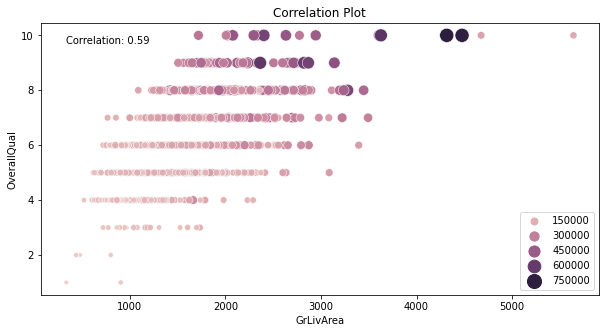

In [13]:
x= train_data['GrLivArea']
y= train_data['OverallQual']
plt.figure(figsize=(10,5))

sns.scatterplot(data=train_data, x=x, y=y, hue="SalePrice", size="SalePrice", sizes=(20, 200))
plt.legend(loc='lower right')

plt.title('Correlation Plot')
correlation = np.corrcoef(x, y)[0, 1]
correlation_text = f'Correlation: {correlation:.2f}'
plt.text(x.min(), y.max(), correlation_text, ha='left', va='top')

plt.show()

In general, there is a positive correlation between the overall quality of the property and the square footage of the above-grade (ground) living area. Moreover, as both variables increase, the value of the property also tends to rise.

>***Here are some plots with potential significant feature interactions:***
> 
> * House sale prices by year.
> * House sale prices by region.
> * House sale prices by "age".
> * House sale prices by "overall quality".

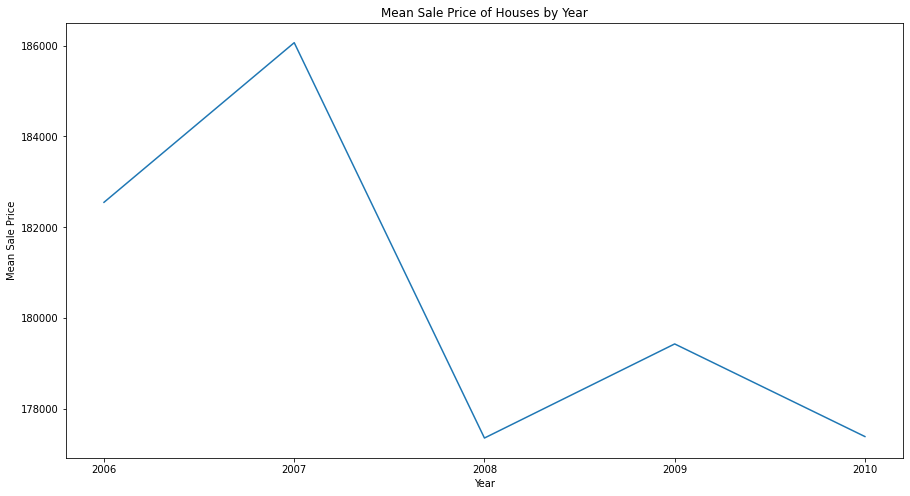

In [14]:
mean_prices = train_data.groupby('YrSold')['SalePrice'].mean()

plt.figure(figsize=(15, 8))

plt.plot(mean_prices.index, mean_prices.values)

plt.xlabel('Year')
plt.ylabel('Mean Sale Price')
plt.title('Mean Sale Price of Houses by Year')

# Format x-axis tick labels as integers
plt.xticks(mean_prices.index.astype(int))

plt.show()

**2008**: The housing bubble crisis in the United States, commonly referred to as the subprime crisis, caused a significant decrease in the average property sale prices.

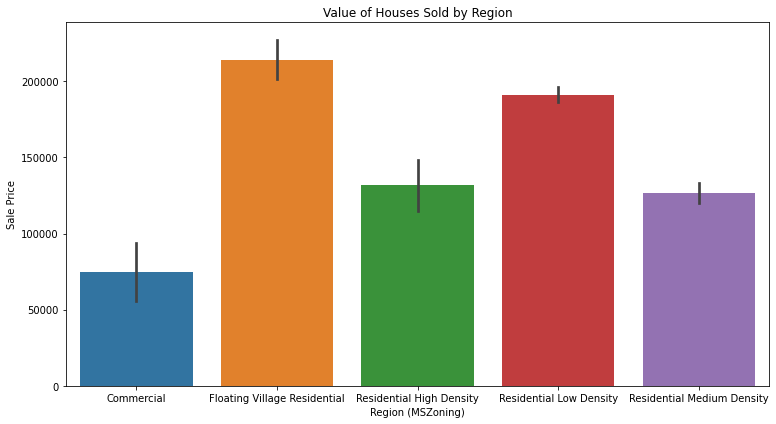

In [15]:
# Create a copy of the train_data dataframe
plot_data = train_data.copy()

# Define the mapping of category names to extended names
zone_mapping = {'A': 'Agriculture',
                'C (all)': 'Commercial',
                'FV': 'Floating Village Residential',
                'I': 'Industrial',
                'RH': 'Residential High Density',
                'RL': 'Residential Low Density',
                'RP': 'Residential Low Density Park',
                'RM': 'Residential Medium Density'}

# Replace the category names with extended names
plot_data['MSZoning'] = plot_data['MSZoning'].replace(zone_mapping)

# Get the unique extended names in alphabetical order
ordered_zones = sorted(plot_data['MSZoning'].unique())

# Plot the bar plot
plt.figure(figsize=(11, 6))
sns.barplot(data=plot_data, x='MSZoning', y='SalePrice', order=ordered_zones)

plt.xlabel('Region (MSZoning)')
plt.ylabel('Sale Price')
plt.title('Value of Houses Sold by Region')

plt.tight_layout()  # Adjust the layout to prevent overlapping labels

plt.show()

We can observe that certain sectors, namely Agriculture, Industrial, and Residential Low Density Park, have no available records.

Additionally, it is noticeable that the average property sale prices are higher in the Floating Village Residential and Residential Low Density regions.

The Residential High Density and Residential Medium Density areas fall in between with intermediate values.

Finally, the Commercial area exhibits the lowest average property sale prices.

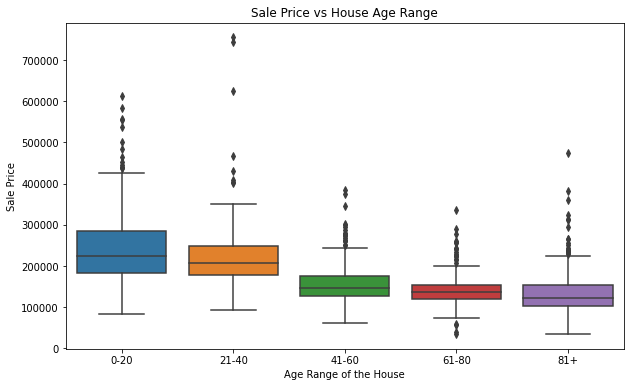

In [16]:
import datetime

# Calculate the age of each house
current_year = datetime.datetime.now().year
house_age = current_year - train_data['YearBuilt']

# Define the age ranges
age_bins = [0, 20, 40, 60, 80, float('inf')]
age_labels = ['0-20', '21-40', '41-60', '61-80', '81+']

# Assign the age ranges to each house
age_range = pd.cut(house_age, bins=age_bins, labels=age_labels)

# Create the plot
plt.figure(figsize=(10, 6))
sns.boxplot(x=age_range, y=train_data['SalePrice'])
plt.xlabel('Age Range of the House')
plt.ylabel('Sale Price')
plt.title('Sale Price vs House Age Range')

plt.show()

In this analysis, we determine the property sale value based on its age.

We find that houses in the 0-20 and 21-40-year ranges are highly valued and command a higher average sale price compared to the other groups (41-60, 61-80, and 81+), which have similar average values among them.

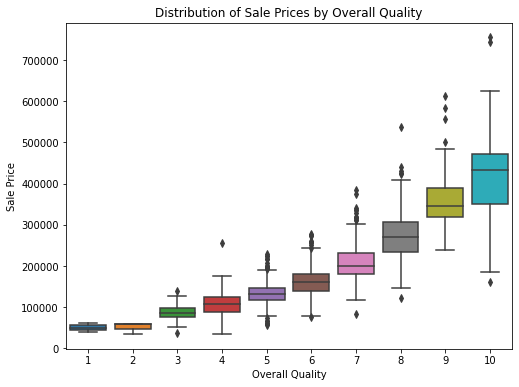

In [17]:
plt.figure(figsize=(8, 6))

sns.boxplot(data=train_data, x='OverallQual', y='SalePrice')

plt.xlabel('Overall Quality')
plt.ylabel('Sale Price')
plt.title('Distribution of Sale Prices by Overall Quality')

plt.show()

A noticeable trend can be observed in this analysis,where the average house sale price increases in relation to its overall quality.

**QUAL A HIPÓTESE DE ANALISAR ESSAS VARIÁVEIS?
CURVA EM LOG? TRANSFORMAÇÃO DOS DADOS?**

> Is combining the house dimension features more advantageous than analyzing them individually?

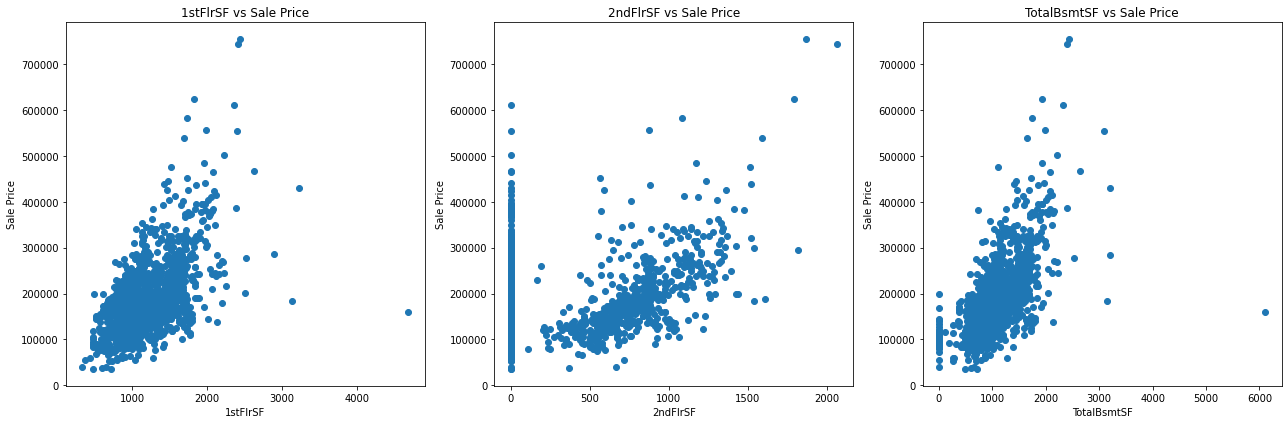

In [18]:
# Create three subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot for 1stFlrSF
axes[0].scatter(train_data['1stFlrSF'], train_data['SalePrice'])
axes[0].set_xlabel('1stFlrSF')
axes[0].set_ylabel('Sale Price')
axes[0].set_title('1stFlrSF vs Sale Price')

# Plot for 2ndFlrSF
axes[1].scatter(train_data['2ndFlrSF'], train_data['SalePrice'])
axes[1].set_xlabel('2ndFlrSF')
axes[1].set_ylabel('Sale Price')
axes[1].set_title('2ndFlrSF vs Sale Price')

# Plot for TotalBsmtSF
axes[2].scatter(train_data['TotalBsmtSF'], train_data['SalePrice'])
axes[2].set_xlabel('TotalBsmtSF')
axes[2].set_ylabel('Sale Price')
axes[2].set_title('TotalBsmtSF vs Sale Price')

plt.tight_layout()
plt.show()

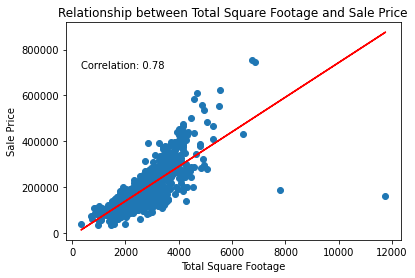

In [19]:
train_data['TotalSqft'] = train_data['1stFlrSF'] + train_data['2ndFlrSF'] + train_data['TotalBsmtSF']
sale_price = train_data['SalePrice']

plt.scatter(train_data['TotalSqft'], sale_price)
plt.xlabel('Total Square Footage')
plt.ylabel('Sale Price')
plt.title('Relationship between Total Square Footage and Sale Price')

# Calculate regression line
regression_line = np.polyfit(train_data['TotalSqft'], sale_price, 1)
plt.plot(train_data['TotalSqft'], np.polyval(regression_line, train_data['TotalSqft']), color='red')

# Calculate correlation
correlation = np.corrcoef(train_data['TotalSqft'], sale_price)[0, 1]
correlation_text = f'Correlation: {correlation:.2f}'
plt.text(train_data['TotalSqft'].min(), sale_price.max(), correlation_text, ha='left', va='top')

plt.show()

By creating this composite variable, a strong correlation is observed, and the data shows less dispersion (except for a few outliers, especially the 2 points in the bottom right). It is recommended to use these variables in conjunction rather than separately.

In [20]:
top_10_values = train_data['TotalSqft'].nlargest(10)
print(top_10_values)

1298    11752
523      7814
1182     6872
691      6760
496      6428
1169     5557
440      5496
1353     5271
1373     5266
798      5066
Name: TotalSqft, dtype: int64


Here we identify two values that deviate from the overall trend observed in the dataset. These values represent properties with exceptionally large square footage but their corresponding sale prices do not align with the expected pattern. This discrepancy suggests that these properties may be located in areas with lower property valuations or they could be considered outliers. To ensure a more accurate analysis, it is recommended to exclude these values from further consideration.

In [21]:
# Find the indices of the 2 highest values
indices = train_data['TotalSqft'].nlargest(2).index

# Delete the rows with the identified indices
train_data = train_data.drop(indices)

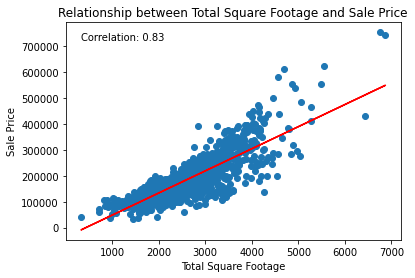

In [22]:
plt.scatter(train_data['TotalSqft'], train_data['SalePrice'])
plt.xlabel('Total Square Footage')
plt.ylabel('Sale Price')
plt.title('Relationship between Total Square Footage and Sale Price')

# Calculate regression line
regression_line = np.polyfit(train_data['TotalSqft'], train_data['SalePrice'], 1)
plt.plot(train_data['TotalSqft'], np.polyval(regression_line, train_data['TotalSqft']), color='red')

# Calculate correlation
correlation = np.corrcoef(train_data['TotalSqft'], train_data['SalePrice'])[0, 1]
correlation_text = f'Correlation: {correlation:.2f}'
plt.text(train_data['TotalSqft'].min(), train_data['SalePrice'].max(), correlation_text, ha='left', va='top')

plt.show()

By excluding only two records, we were able to reduce the scatter and improve the correlation between the variables.

We will also exclude 'GrLivArea' from the analysis since it has a lower correlation with the target variable compared to the newly created variable 'TotalSqft'. Moreover, 'TotalSqft' provides a more comprehensive measure of the properties as it includes the basement area in addition to the above-ground living area.

In [23]:
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,TotalSqft
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,2566
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,2524
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,2706
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,2473
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,3343


# DATA PREPROCESSING AND FEATURE SELECTION

In [24]:
list(set(train_data.dtypes.tolist()))    

[dtype('float64'), dtype('int64'), dtype('O')]

> ***Classifying the variables into numeric and categorical:***

In [25]:
numerical = pd.DataFrame(train_data, columns=['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
                                              'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
                                              'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
                                              'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars',
                                              'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
                                              'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'HouseAge', 'TotalSqft'])
categorical = pd.DataFrame(train_data, columns=['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
                                                'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
                                                'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
                                                'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual',
                                                'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
                                                'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
                                                'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
                                                'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType',
                                                'SaleCondition'])

array([[<AxesSubplot:title={'center':'LotFrontage'}>,
        <AxesSubplot:title={'center':'LotArea'}>,
        <AxesSubplot:title={'center':'YearBuilt'}>,
        <AxesSubplot:title={'center':'YearRemodAdd'}>,
        <AxesSubplot:title={'center':'MasVnrArea'}>,
        <AxesSubplot:title={'center':'BsmtFinSF1'}>],
       [<AxesSubplot:title={'center':'BsmtFinSF2'}>,
        <AxesSubplot:title={'center':'BsmtUnfSF'}>,
        <AxesSubplot:title={'center':'TotalBsmtSF'}>,
        <AxesSubplot:title={'center':'1stFlrSF'}>,
        <AxesSubplot:title={'center':'2ndFlrSF'}>,
        <AxesSubplot:title={'center':'LowQualFinSF'}>],
       [<AxesSubplot:title={'center':'GrLivArea'}>,
        <AxesSubplot:title={'center':'BsmtFullBath'}>,
        <AxesSubplot:title={'center':'BsmtHalfBath'}>,
        <AxesSubplot:title={'center':'FullBath'}>,
        <AxesSubplot:title={'center':'HalfBath'}>,
        <AxesSubplot:title={'center':'BedroomAbvGr'}>],
       [<AxesSubplot:title={'center':'Kitchen

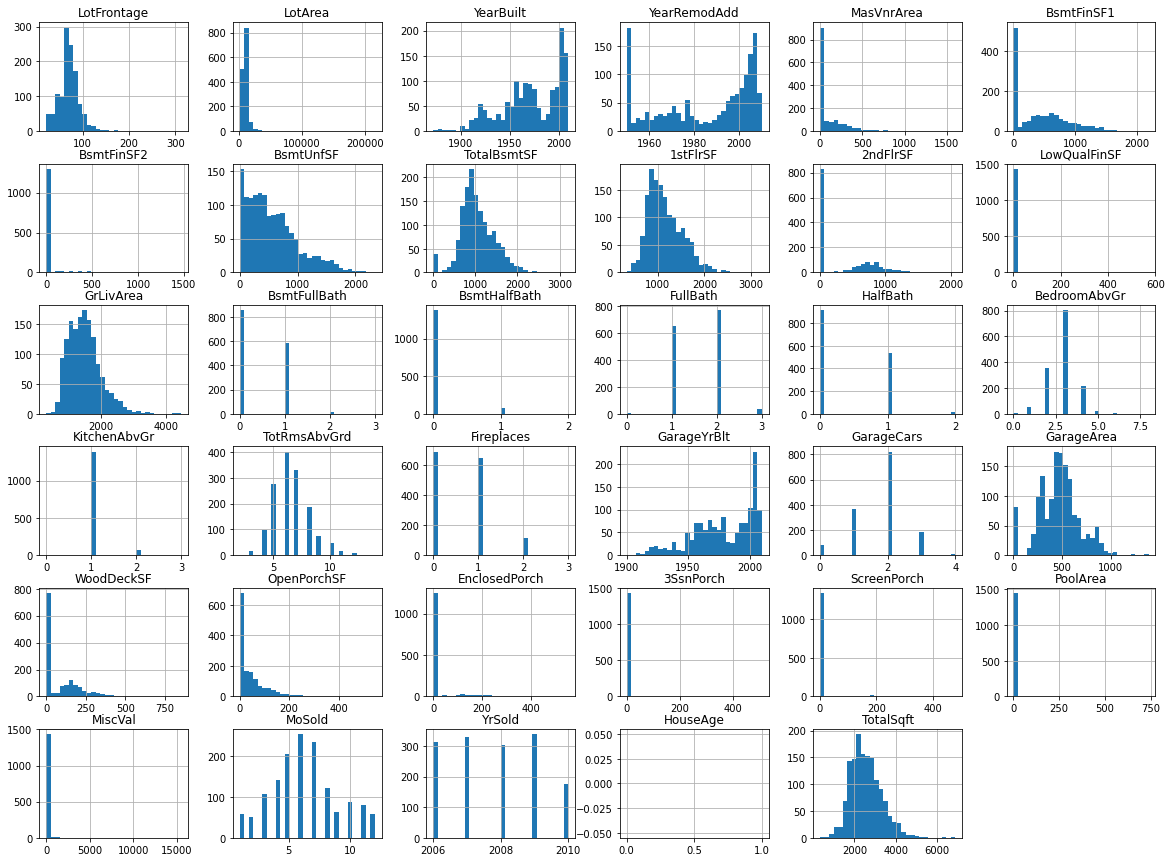

In [26]:
numerical.hist(figsize=(20,15),bins=30)

After examining the histograms, it has been determined that variables that may have minimal impact on the statistical analysis (due to having exhibit a significant imbalance in their categories distribution) will be excluded. The following numeric variables will be excluded:

'BsmtFinSF2', 'LowQualFinSF', 'BsmtHalfBath', 'KitchenAbvGr', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal'

In [27]:
categorical.shape[1] #number of columns

46

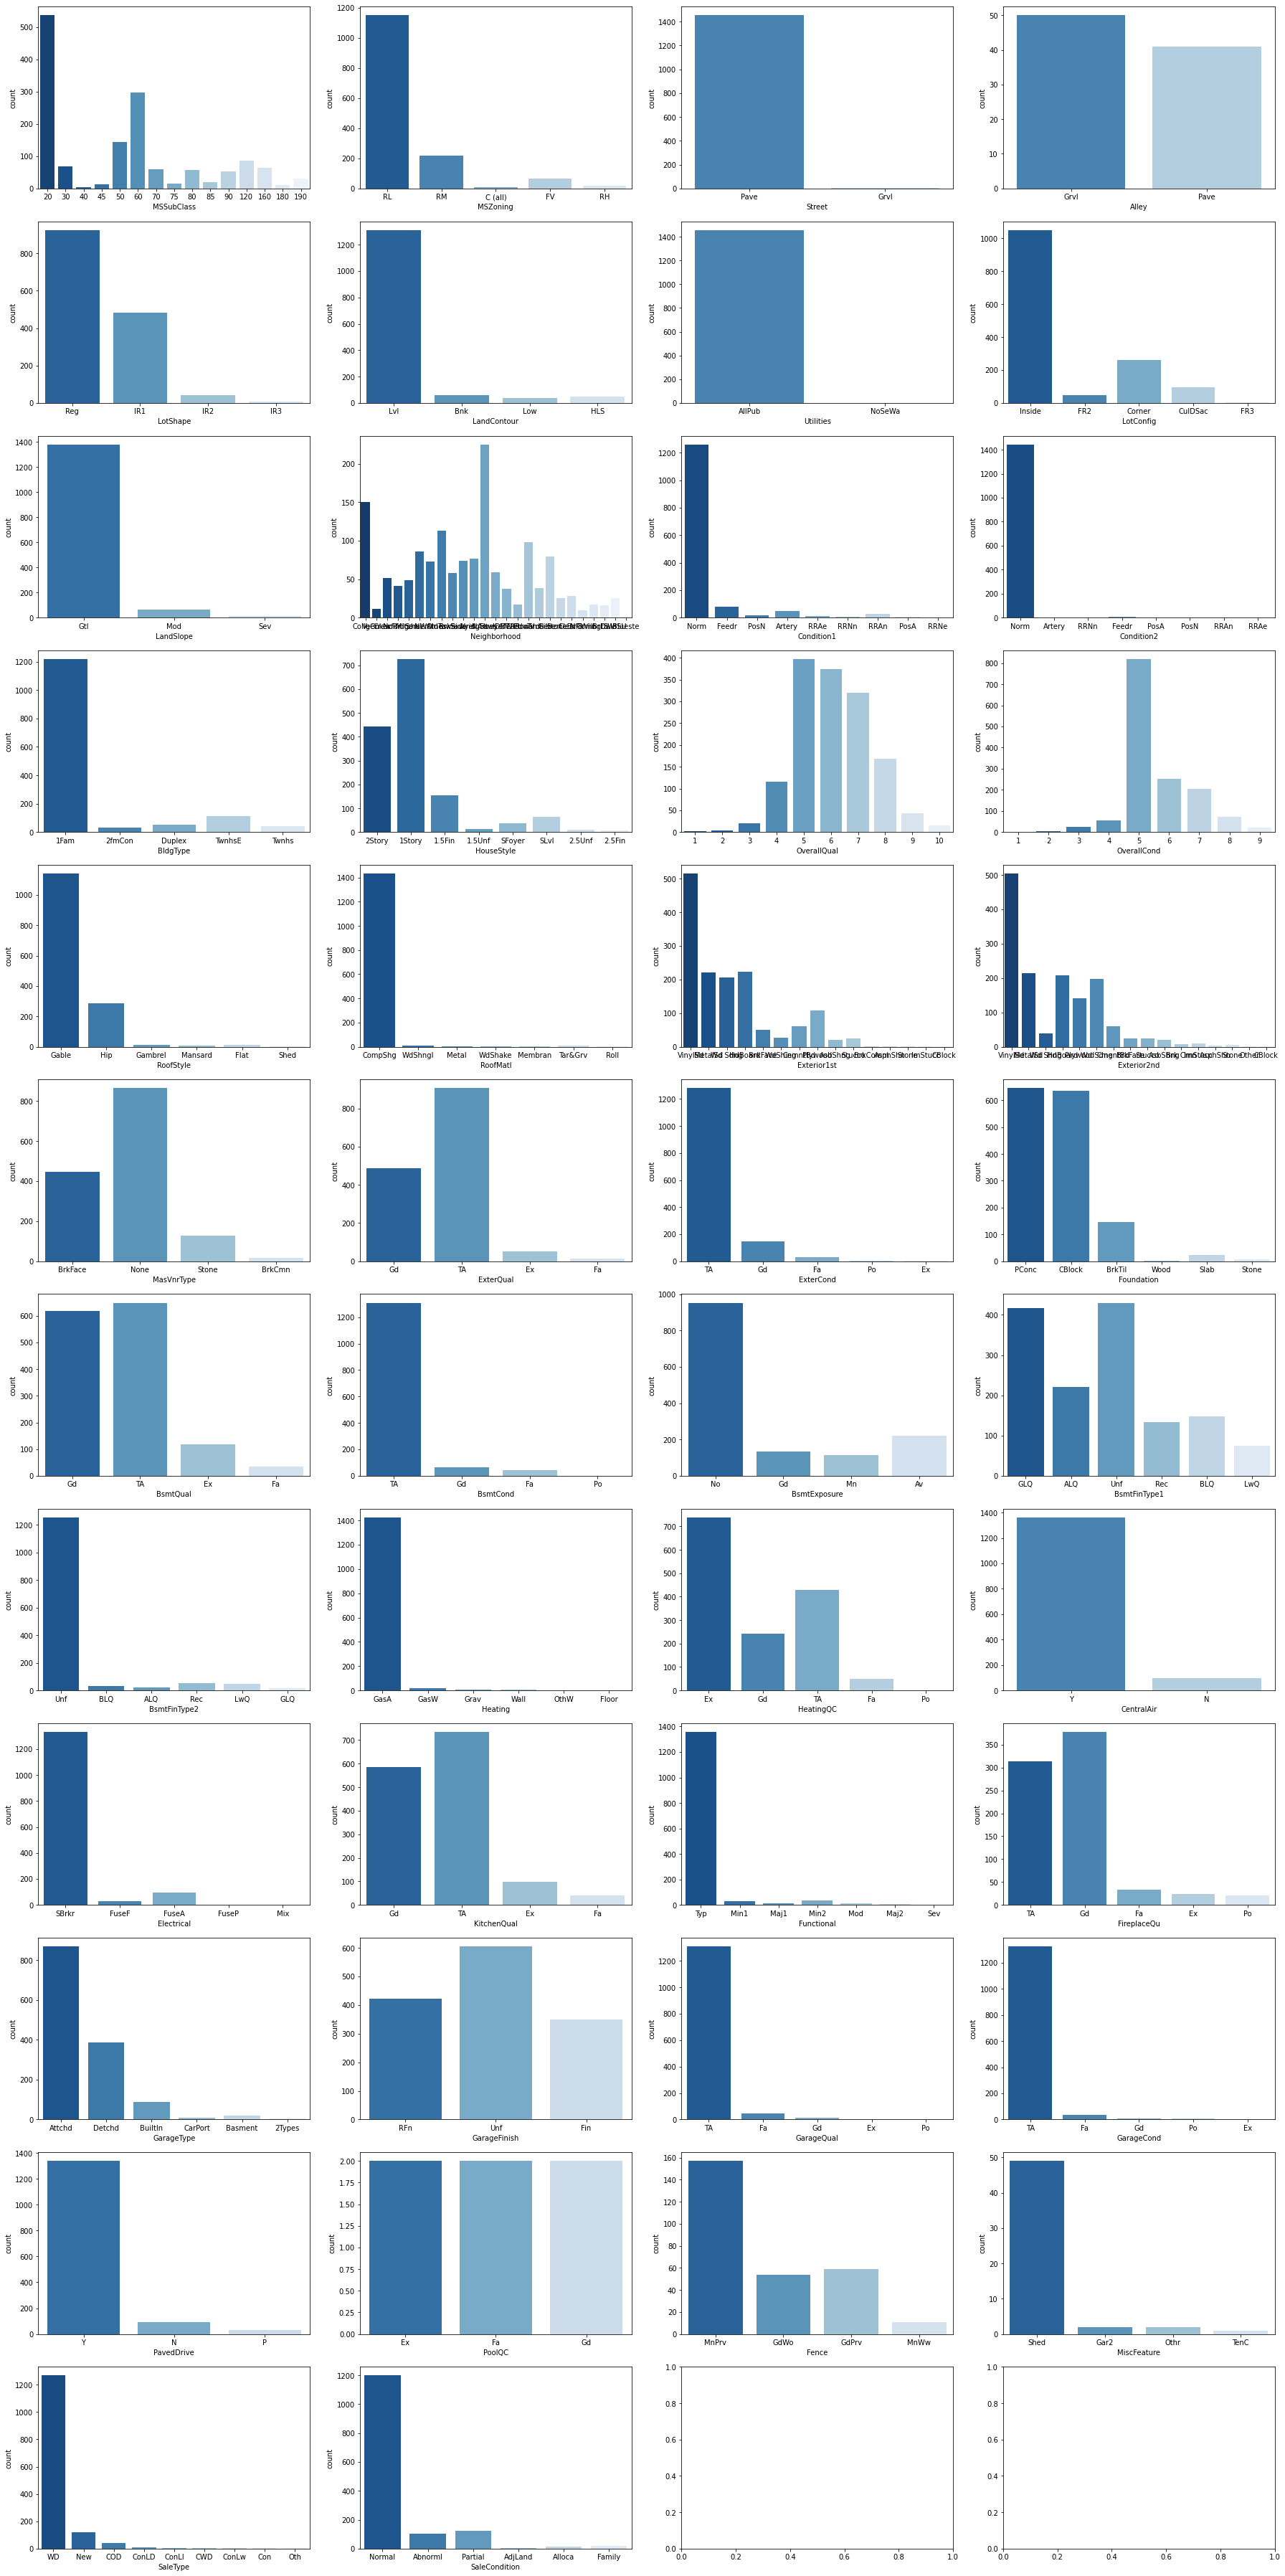

In [28]:
fig, ax = plt.subplots(12, 4, figsize=(25, 50))

for i, subplots in zip(categorical, ax.flatten()):  
  sns.countplot(data=categorical, x=categorical[i], ax=subplots, palette='Blues_r')

plt.tight_layout()
plt.show()

After examining the countplots, it has been decided to exclude categorical variables that are likely to have limited impact on the statistical analysis. These variables exhibit a significant imbalance in their distribution, with a majority of values concentrated in one category and very few in the remaining categories. The following categorical variables will be eliminated:

'Street', 'LandContour', 'Utilities', 'LandSlope', 'Condition1', 'Condition2', 'BldgType', 'RoofMatl', 'ExterCond', 'BsmtCond', 'BsmtFinType2', 'Heating',  'CentralAir', 'Electrical',  'Functional',  'GarageQual', 'GarageCond', 'PavedDrive', 'MiscFeature', 'SaleType', 'SaleCondition'


> ***Handling missing values***

<AxesSubplot:>

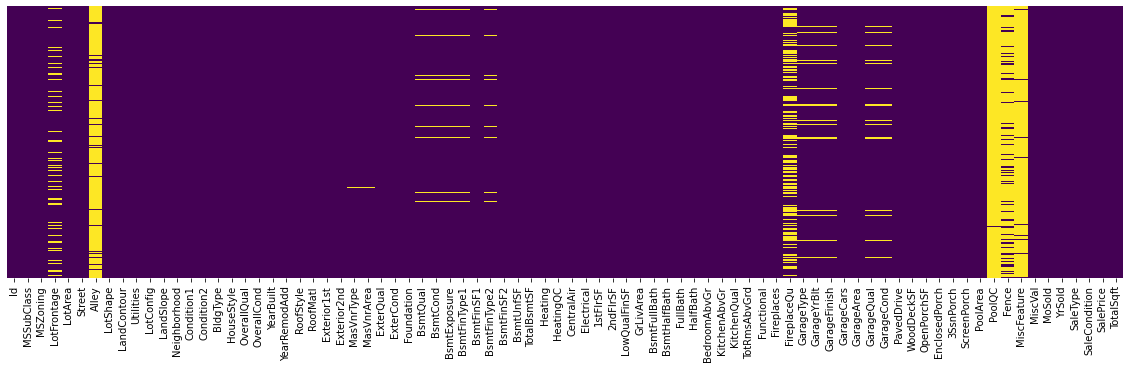

In [29]:
plt.figure(figsize=(20,5))
sns.heatmap(train_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Based on the analysis of the heatmap, the decision was made to exclude variables with a high number of missing values as well as the identification variable ('Id'), which does not contribute to the analysis.

The following categorical variables will be removed: 'Alley', 'FireplaceQu', 'PoolQc', 'Fence', and 'MiscFeature'.

The remaining variables that contain missing values are: 'LotFrontage', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', and 'GarageCond'.

We will also remove the variables used to create new variables.
'1stFlrSF', '2ndFlrSF', 'TotalBsmtSF', 'YearBuilt'

In [30]:
#remove columns
del_col = ['Id', 'Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature', 'BsmtFinSF2', 'LowQualFinSF', 'BsmtHalfBath', 'KitchenAbvGr', 'EnclosedPorch',
           '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'Street', 'LandContour', 'Utilities', 'LandSlope', 'Condition1', 'Condition2', 'BldgType',
           'RoofMatl', 'ExterCond', 'BsmtCond', 'BsmtFinType2', 'Heating',  'CentralAir', 'Electrical',  'Functional', 'GarageArea', 'GarageQual',
           'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition', '1stFlrSF', '2ndFlrSF', 'TotalBsmtSF', 'YearBuilt', 'GrLivArea']

train_data.drop(del_col,axis=1,inplace=True)

<AxesSubplot:>

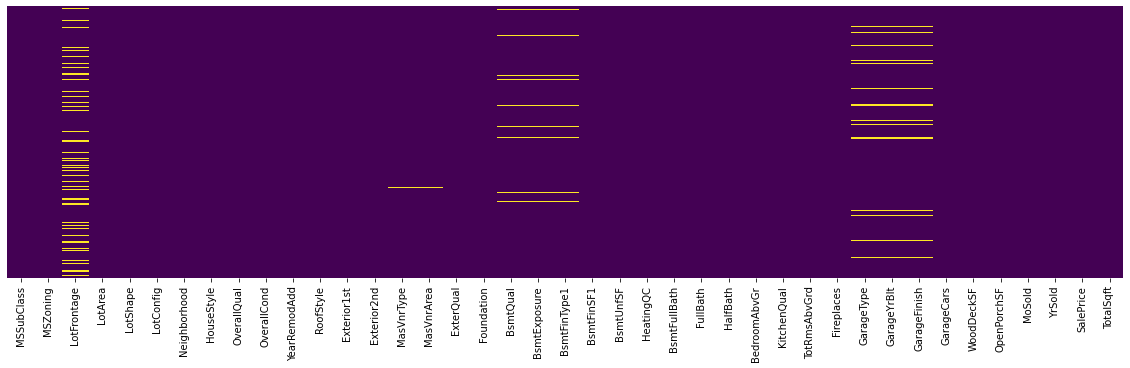

In [31]:
plt.figure(figsize=(20,5))
sns.heatmap(train_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [32]:
cols = pd.DataFrame(train_data, columns=['LotFrontage', 'MasVnrType', 'MasVnrArea',
                                         'BsmtQual', 'BsmtExposure', 'BsmtFinType1',
                                         'GarageType', 'GarageYrBlt', 'GarageFinish'])
                    
for c in cols:
    print(c,':', cols[c].isnull().sum())

LotFrontage : 259
MasVnrType : 8
MasVnrArea : 8
BsmtQual : 37
BsmtExposure : 38
BsmtFinType1 : 37
GarageType : 81
GarageYrBlt : 81
GarageFinish : 81


In [33]:
print('Missing data:')
for c in cols:
    print(c,':',round(((cols[c].isnull().sum())*100/len(train_data)),1),'%')

Missing data:
LotFrontage : 17.8 %
MasVnrType : 0.5 %
MasVnrArea : 0.5 %
BsmtQual : 2.5 %
BsmtExposure : 2.6 %
BsmtFinType1 : 2.5 %
GarageType : 5.6 %
GarageYrBlt : 5.6 %
GarageFinish : 5.6 %


We will use the following approach to address missing values:

* If a feature has **more than 20%** missing data, the variable will be deleted.
* For features with **less than 20%** missing values:
    * numerical variables: the missing values will be filled with the mean or median of the variable.
    * categorical variables: the missing values will be filled with the most frequent category.
* For features with **less than 2%** missing values, the records will be deleted.

In [34]:
alpha = 0.05
k2, p = stats.normaltest(train_data.LotFrontage, nan_policy='omit')

#Null Hypothesis: The data follows a normal distribution.
#Alternative Hypothesis: The data does not follow a normal distribution.
print("p = {:g}".format(p))
if p < alpha:
    print("The null hypothesis can be rejected.")
else:
    print("The null hypothesis cannot be rejected.")

p = 1.39712e-109
The null hypothesis can be rejected.


In [35]:
alpha = 0.05
#k2, p = print([stats.normaltest(cols[i]) for i in cols])
k2, p = stats.normaltest(train_data.GarageYrBlt, nan_policy='omit')

#Null Hypothesis: The data follows a normal distribution.
#Alternative Hypothesis: The data does not follow a normal distribution.
print("p = {:g}".format(p))
if p < alpha:
    print("The null hypothesis can be rejected.")
else:
    print("The null hypothesis cannot be rejected.")

p = 5.21756e-22
The null hypothesis can be rejected.


When the p-value is less than or equal to alpha (0.05), it implies that the p-value is small enough to reject the null hypothesis (H0). In this case, we conclude that the sample does not follow a normal distribution. As a result, we choose to use the median to fill in the missing values in the variables under consideration.

In [36]:
train_data['LotFrontage'].fillna(train_data['LotFrontage'].median(), inplace=True)
train_data['GarageYrBlt'].fillna(train_data['GarageYrBlt'].median(), inplace=True)

To fill in the remaining categorical variables, we will use the mode.

In [37]:
train_data['BsmtQual'].fillna(train_data['BsmtQual'].mode()[0], inplace=True)
train_data['BsmtExposure'].fillna(train_data['BsmtExposure'].mode()[0], inplace=True)
train_data['BsmtFinType1'].fillna(train_data['BsmtFinType1'].mode()[0], inplace=True)
train_data['GarageType'].fillna(train_data['GarageType'].mode()[0], inplace=True)
train_data['GarageFinish'].fillna(train_data['GarageFinish'].mode()[0], inplace=True)

MasVnrType, MasVnrArea - the records will be deleted.

In [38]:
train_data.dropna(axis=0, inplace=True)

<AxesSubplot:>

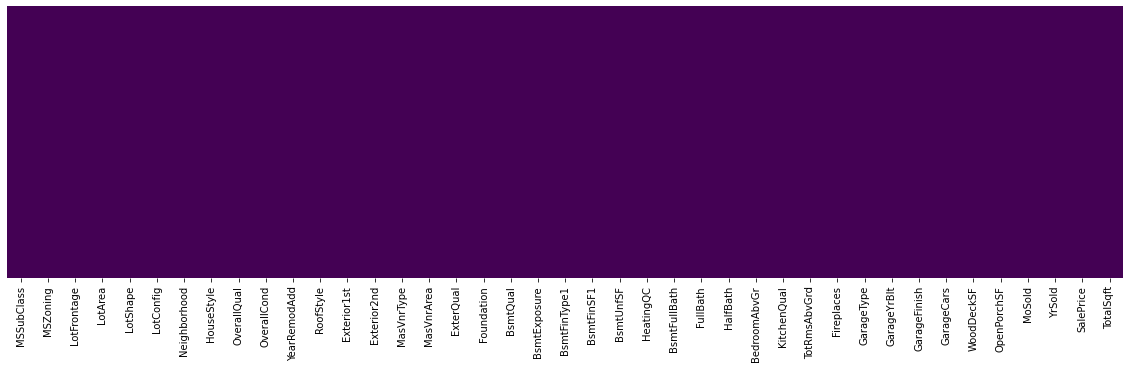

In [39]:
plt.figure(figsize=(20,5))
sns.heatmap(train_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

> ***Treatment of Categorical Variables***

> Transform categorical variables into a format that can be easily interpreted by machine learning algorithms. 
> 
> * Label Encoder: introduces an arbitrary ordering of the categories, so it was utilized in catagorical ordinal variables. 
> 
> * One-Hot Encoder: transform categorical variables into a binary vector representation. It is useful in scenarios where the categorical variable does not have an inherent order or numerical significance, that is, categorical nominal variables.

In [40]:
from sklearn.preprocessing import LabelEncoder

ordinal_cols = ['LotShape', 'OverallQual', 'OverallCond', 'ExterQual', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1',
                'HeatingQC', 'KitchenQual', 'GarageFinish', 'RoofStyle']

label_encoder = LabelEncoder()

for col in ordinal_cols:
    train_data[col] = label_encoder.fit_transform(train_data[col].astype(str))

In [41]:
train_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtUnfSF,HeatingQC,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,WoodDeckSF,OpenPorchSF,MoSold,YrSold,SalePrice,TotalSqft
0,60,RL,65.0,8450,3,Inside,CollgCr,2Story,7,4,2003,1,VinylSd,VinylSd,BrkFace,196.0,2,PConc,2,3,2,706,150,0,1,2,1,3,2,8,0,Attchd,2003.0,1,2,0,61,2,2008,208500,2566
1,20,RL,80.0,9600,3,FR2,Veenker,1Story,6,7,1976,1,MetalSd,MetalSd,None,0.0,3,CBlock,2,1,0,978,284,0,0,2,0,3,3,6,1,Attchd,1976.0,1,2,298,0,5,2007,181500,2524
2,60,RL,68.0,11250,0,Inside,CollgCr,2Story,7,4,2002,1,VinylSd,VinylSd,BrkFace,162.0,2,PConc,2,2,2,486,434,0,1,2,1,3,2,6,1,Attchd,2001.0,1,2,0,42,9,2008,223500,2706
3,70,RL,60.0,9550,0,Corner,Crawfor,2Story,7,4,1970,1,Wd Sdng,Wd Shng,None,0.0,3,BrkTil,3,3,0,216,540,2,1,1,0,3,2,7,1,Detchd,1998.0,2,3,0,35,2,2006,140000,2473
4,60,RL,84.0,14260,0,FR2,NoRidge,2Story,8,4,2000,1,VinylSd,VinylSd,BrkFace,350.0,2,PConc,2,0,2,655,490,0,1,2,1,4,2,9,1,Attchd,2000.0,1,3,192,84,12,2008,250000,3343


In [42]:
null_counts = train_data.isnull().sum()
null_vars = null_counts[null_counts > 0]
print(null_vars)

Series([], dtype: int64)


In [43]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1450 entries, 0 to 1459
Data columns (total 41 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MSSubClass    1450 non-null   int64  
 1   MSZoning      1450 non-null   object 
 2   LotFrontage   1450 non-null   float64
 3   LotArea       1450 non-null   int64  
 4   LotShape      1450 non-null   int64  
 5   LotConfig     1450 non-null   object 
 6   Neighborhood  1450 non-null   object 
 7   HouseStyle    1450 non-null   object 
 8   OverallQual   1450 non-null   int64  
 9   OverallCond   1450 non-null   int64  
 10  YearRemodAdd  1450 non-null   int64  
 11  RoofStyle     1450 non-null   int64  
 12  Exterior1st   1450 non-null   object 
 13  Exterior2nd   1450 non-null   object 
 14  MasVnrType    1450 non-null   object 
 15  MasVnrArea    1450 non-null   float64
 16  ExterQual     1450 non-null   int64  
 17  Foundation    1450 non-null   object 
 18  BsmtQual      1450 non-null 

In [44]:
from sklearn.preprocessing import OneHotEncoder

# Select the nominal columns
nominal_cols = ['MSSubClass', 'MSZoning', 'LotConfig', 'Neighborhood', 'HouseStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'GarageType']

# Create a subset of the nominal columns
nominal_data = train_data[nominal_cols]

# Apply One-Hot Encoding
encoder = OneHotEncoder(drop='first', sparse=False, handle_unknown='ignore')
encoded_data = pd.DataFrame(encoder.fit_transform(nominal_data))

# Get the feature names after encoding
feature_names = encoder.get_feature_names_out(nominal_cols)

# Assign the feature names to the encoded dataframe
encoded_data.columns = feature_names

# Reset the index of the original dataframe and the encoded dataframe
train_data.reset_index(drop=True, inplace=True)
encoded_data.reset_index(drop=True, inplace=True)

# Concatenate the encoded dataframe with the original dataframe
train_data = pd.concat([train_data, encoded_data], axis=1)

In [45]:
# Drop the original nominal columns from the dataframe
train_data = train_data.drop(columns=nominal_cols)

In [46]:
null_counts = train_data.isnull().sum()
null_vars = null_counts[null_counts > 0]
print(null_vars)

Series([], dtype: int64)


In [47]:
null_counts = encoded_data.isnull().sum()
null_vars = null_counts[null_counts > 0]
print(null_vars)

Series([], dtype: int64)


In [48]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1450 entries, 0 to 1449
Columns: 126 entries, LotFrontage to GarageType_Detchd
dtypes: float64(98), int64(28)
memory usage: 1.4 MB


In [49]:
train_data.head()

,LotFrontage,LotArea,LotShape,OverallQual,OverallCond,YearRemodAdd,RoofStyle,MasVnrArea,ExterQual,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtUnfSF,HeatingQC,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageFinish,GarageCars,WoodDeckSF,OpenPorchSF,MoSold,YrSold,SalePrice,TotalSqft,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd
0,65.0,8450,3,7,4,2003,1,196.0,2,2,3,2,706,150,0,1,2,1,3,2,8,0,2003.0,1,2,0,61,2,2008,208500,2566,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,80.0,9600,3,6,7,1976,1,0.0,3,2,1,0,978,284,0,0,2,0,3,3,6,1,1976.0,1,2,298,0,5,2007,181500,2524,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,68.0,11250,0,7,4,2002,1,162.0,2,2,2,2,486,434,0,1,2,1,3,2,6,1,2001.0,1,2,0,42,9,2008,223500,2706,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,60.0,9550,0,7,4,1970,1,0.0,3,3,3,0,216,540,2,1,1,0,3,2,7,1,1998.0,2,3,0,35,2,2006,140000,2473,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,84.0,14260,0,8,4,2000,

# MACHINE LEARINING

In [50]:
from sklearn.model_selection import train_test_split

In [51]:
y = train_data['SalePrice']
X = train_data.drop(['SalePrice'], axis=1)

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

**LINEAR REGRESSION**

In [53]:
from sklearn.linear_model import LinearRegression

In [54]:
lm = LinearRegression()

In [55]:
lm.fit(X_train,y_train)

LinearRegression()

In [56]:
#print the intercept -- the house price when all independent variables are zero
print(lm.intercept_)

1056933.0682367503


In [57]:
#print the coefficients -- indicate the change in the dependent variable for a one-unit change in the corresponding independent variable, while holding all other variables constant.
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
print(coeff_df.to_string())

                       Coefficient
LotFrontage             135.413547
LotArea                   0.461587
LotShape                 88.167714
OverallQual            -569.010924
OverallCond            6521.527290
YearRemodAdd             91.960378
RoofStyle              2345.929030
MasVnrArea               42.775760
ExterQual             -7566.684330
BsmtQual              -7658.676804
BsmtExposure          -2874.042459
BsmtFinType1           1112.622831
BsmtFinSF1               11.913988
BsmtUnfSF               -14.081387
HeatingQC              -245.793107
BsmtFullBath           -501.150169
FullBath               6721.770765
HalfBath               3806.876237
BedroomAbvGr          -5665.048441
KitchenQual           -5855.514271
TotRmsAbvGrd           1849.211170
Fireplaces             2712.212487
GarageYrBlt             104.112176
GarageFinish           -612.297743
GarageCars             6657.773045
WoodDeckSF               12.112246
OpenPorchSF              18.702510
MoSold              

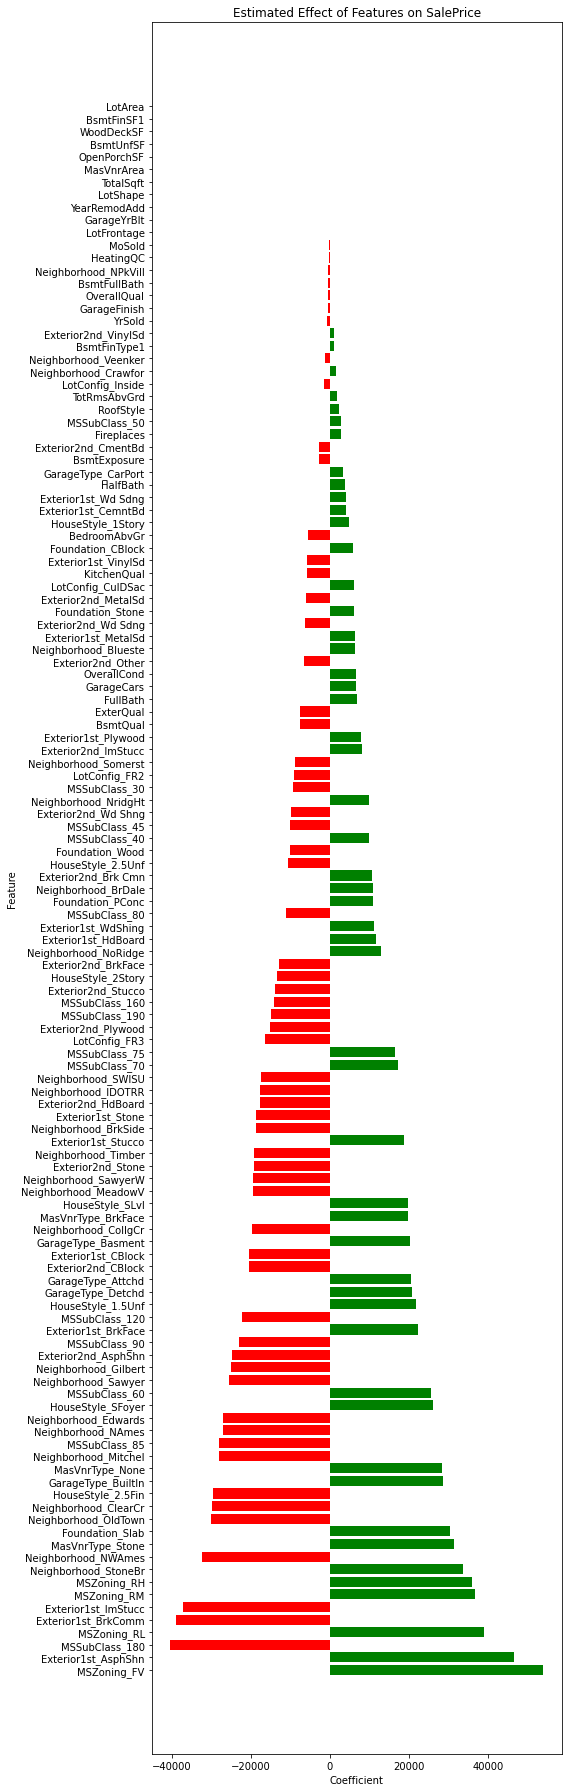

In [58]:
# Sort the coefficients by absolute value in descending order
sorted_coeffs = coeff_df['Coefficient'].abs().sort_values(ascending=False)

# Determine the colors for the bars based on coefficient values
colors = np.where(coeff_df.loc[sorted_coeffs.index, 'Coefficient'] >= 0, 'green', 'red')

# Create a vertical bar plot of the coefficients
plt.figure(figsize=(8, 25))
plt.barh(range(len(sorted_coeffs)), coeff_df.loc[sorted_coeffs.index, 'Coefficient'], color=colors)
plt.yticks(range(len(sorted_coeffs)), sorted_coeffs.index)
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.title('Estimated Effect of Features on SalePrice')
plt.tight_layout()
plt.show()

In the context of a linear regression model, the magnitude of the coefficient represents the strength and direction of the relationship between the corresponding feature and the target variable.

If a variable has a very small bar or is not present in the plot, it suggests that its coefficient is close to zero or has a negligible impact on the model's predictions. In such cases, removing those variables from the model may not significantly affect the model's performance.

However, it's important to note that the interpretation of the coefficients and the decision to remove variables should be based on a thorough analysis and consideration of other factors. Sometimes, even small coefficients can be important in the presence of interactions or nonlinear relationships with other variables. Additionally, domain knowledge and understanding of the data-generating process can provide valuable insights into the relevance of variables.

Therefore, while the coefficient plot can be a helpful tool for identifying potentially less influential variables, it should be used in combination with other techniques such as feature importance analysis, statistical tests, and domain knowledge to make informed decisions about variable selection and model refinement.

In [59]:
predictions = lm.predict(X_test)

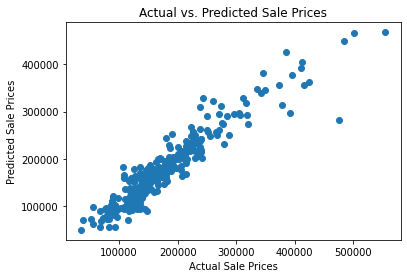

In [60]:
plt.scatter(y_test, predictions)
plt.title("Actual vs. Predicted Sale Prices")
plt.xlabel("Actual Sale Prices")
plt.ylabel("Predicted Sale Prices")
plt.show()

A perfect diagonal line would indicate 100% correspondence between the predicted values and the actual values. In the plotted data, we can observe a nearly diagonal line; however, the data points are slightly scattered around the central line.

In [61]:
from sklearn import metrics

In [62]:
#difference between the predicted values and the actual values
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 18420.739134388976
MSE: 727151919.1447388
RMSE: 26965.75456286619


MAE - Mean Absolute Error: it's just the average error

MSE - Mean Squared Error: "punishes" larger errors, which tends to be useful in real world data

RMSE - Root Mean Squared Error: it's interpretable in the "y" units

The objective is to minimize all these values in order to create the best model.

**RANDOM FOREST**

In [63]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [64]:
# Define the target variable
target_variable = 'SalePrice'

In [65]:
# Split the data into features (X) and target (y)
X = train_data.drop(target_variable, axis=1)
y = train_data[target_variable]

In [66]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [67]:
# Create the Random Forest model
random_forest = RandomForestRegressor(random_state=42)

In [68]:
# Fit the model to the training data
random_forest.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [69]:
# Make predictions on the test data
predictions = random_forest.predict(X_test)

In [70]:
# Evaluate the model
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)

MAE: 16584.766000000003
MSE: 612328366.5033745
RMSE: 24745.26957831283


MAE - Mean Absolute Error: represents the average of the absolute difference between the actual and predicted values in the dataset. It measures the average of the residuals in the dataset.


MSE - Mean Squared Error: represents the average of the squared difference between the original and predicted values in the data set. It measures the variance of the residuals. It "punishes" larger errors, which tends to be useful in real world data.

RMSE - Root Mean Squared Error: is the square root of Mean Squared error. It measures the standard deviation of residuals. It's interpretable in the "y" units

The objective is to minimize all these values in order to create the best model. For comparing the accuracy among different linear regression models, RMSE is a better choice

> ***We can observe that this model performed better than the previous one, as the error measures have been reduced.***

In [71]:
# Get feature importances
feature_importances = random_forest.feature_importances_

# Create a DataFrame to store feature importances
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance (relative) in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Print the top 10 most important features
print(importance_df.head(10))

         Feature  Importance
29     TotalSqft    0.713673
3    OverallQual    0.059454
9       BsmtQual    0.035266
22   GarageYrBlt    0.022461
5   YearRemodAdd    0.016159
12    BsmtFinSF1    0.014855
1        LotArea    0.013125
19   KitchenQual    0.011586
8      ExterQual    0.010387
13     BsmtUnfSF    0.009092


In [72]:
# Create the Random Forest model with modified parameters
random_forest = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)

# Fit the model to the training data
random_forest.fit(X_train, y_train)

# Make predictions on the test data
predictions = random_forest.predict(X_test)

# Evaluate the model using MAE, MSE, and RMSE
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)

MAE: 16616.135896078762
MSE: 610648510.8173475
RMSE: 24711.303300662785


The parameters used did not significantly alter the error values. Modifying the parameters can cause overfitting, which afect the reproducibility of the model.

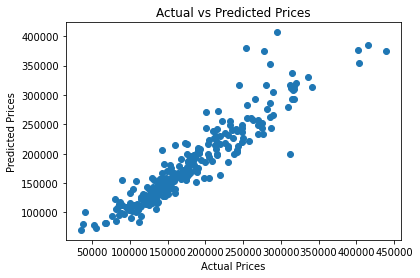

In [73]:
plt.scatter(y_test, predictions)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')

plt.show()

The dispersion was much lower in the Random Forest model compared to Linear Regression model. We can only see a few outliers.